In [1]:
using ACME

In [2]:
cir = @circuit begin
    u = voltagesource()
    v = voltagesource()
    c = capacitor(100e-9)
    r = resistor(1000)
    i = currentprobe()
end

connect!(cir, (:u, +), (:v, -))
connect!(cir, (:v, +), (:c, 1))
connect!(cir, (:c, 2), (:r, 1))
connect!(cir, (:r, 2), (:i, +))
connect!(cir, (:i, -), :gnd)
connect!(cir, (:u, -), :gnd)

Δt = 1e-6
model = DiscreteModel(cir, Δt)
nothing

In [3]:
t = 0:Δt:1e-3
u = zeros(length(t))
y = similar(u)

for i=1:length(t)
    u[i] = 0.0
    y[i,:,:].= run!(model, reshape([1.0 u[i]], 2, 1))
end

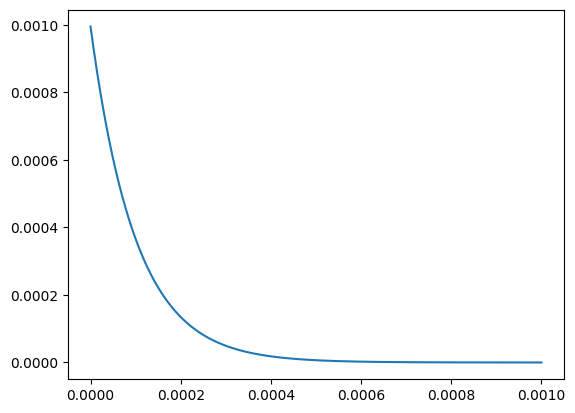

┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/bach/.julia/packages/PyPlot/XaELc/src/init.jl:198
┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /Users/bach/.julia/packages/PyCall/L0fLP/src/numpy.jl:67


1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x11a73b310>

In [4]:
using PyPlot
plot(t, y)

In [5]:
include("circuit-model.jl")

A, B, C, Di, Ei, Fi, Dv, Ev, Fv, Dq, Eq, Fq = matrices(cir, Δt, 5)
x̄, y, ū, q̄, z = states(B, C, Di, Dq)

dmodel = DifferentiableModel(A, B, C, Di, Ei, Fi, Dq, Eq, Fq,
    x̄, y, ū, q̄, z, Dict{String, Any}())
nothing

In [6]:
u = zeros(length(t))
y = similar(u)

for i=1:length(t)
    u[i] = 0.0
    y[i,:,:] = step!(dmodel, reshape([1.0, u[i]], 2, 1))
end

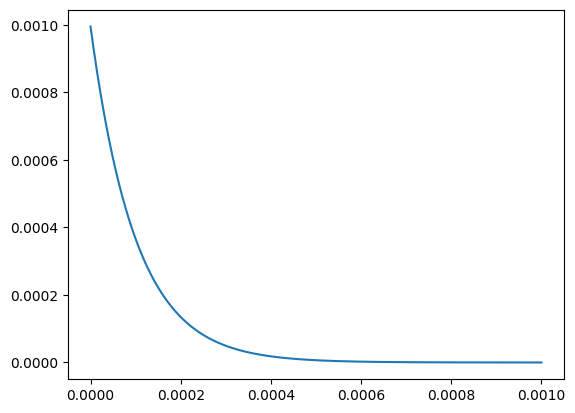

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x11aa2f2e0>

In [7]:
using PyPlot
plot(t, y)